In [2]:
#Annexes. Initialisation
import visualID as vID
from visualID import color
vID.init()

**Début à:** Wednesday 22 June 2022, 11:05:14  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="./svg/logoBegin.svg" style="margin-left:auto; margin-right:auto"/></p>

## Annexes & fonds de tiroirs

### A. Pandas et corrélation de données

**La première partie a pour but de créer des données au format pandas. Certaines sont corrélées entre elles. On va vérifier que la carte thermique est cohérente avec les corrélations**


Création des données. Vous n'avez aucune intervention à faire dans cette cellule, à part l'exécuter

In [2]:
%matplotlib inline
import numpy as np 
import seaborn as sb
from pylab import *
import random
sb.set_style("ticks")

def noiseF(f, X):
    noise = 2
    N = noise * np.random.normal(0,1,nbp)
#    print(N)
    # c_ "translates slice objects to concatenation along the second axis of the resulting 2D array" (cf doc)
    # en d'autres termes on concatène les colonnes de A & B quand on appelle c_(A,B) 
    tab = np.c_[X,f(X)+N]
    return tab 

def f0(x):
    return 50
def f1(x):
    return 3*x
def f2(x):
    return -5*x
def f3(x):
    return x**2
def f4(x):
    return sin(x)*50
def f5(x):
    return cos(x)*50

nbp = 100
xmin = -10
xmax = 10. 
# vecteur X
# random.uniform(low=0.0, high=1.0, size=None)
X = np.random.uniform(xmin,xmax,nbp)
#print(X)
data0 = noiseF(f0,X)
data1 = noiseF(f1,X)
data2 = noiseF(f2,X)
data3 = noiseF(f3,X)
data4 = noiseF(f4,X)
data5 = noiseF(f5,X)

On va tracer les 4 fonctions pour voir à quoi elles ressemblent.  Vérifier de visu que les distributions de points sont cohérentes avec les expressions des fonctions

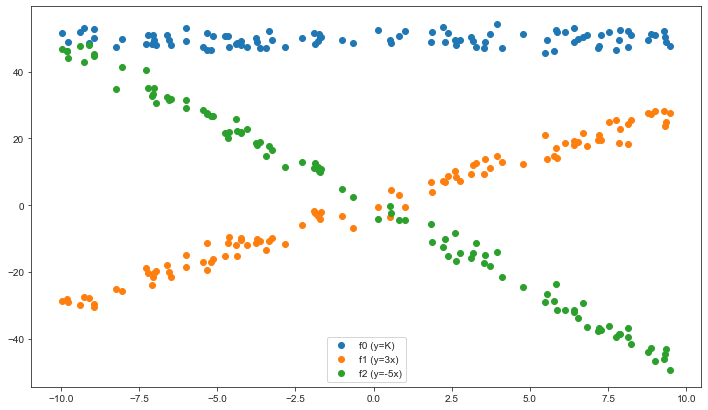

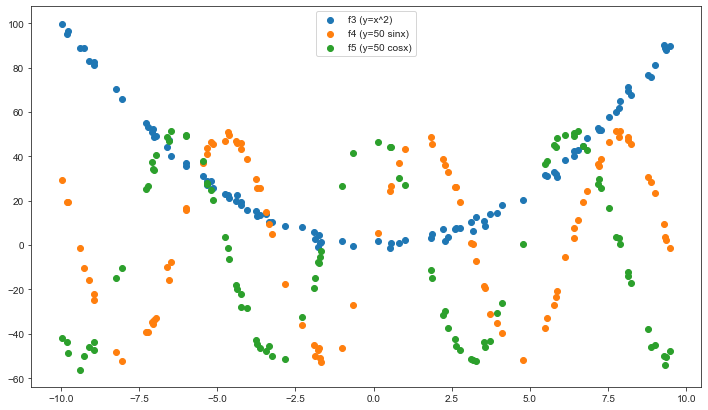

In [2]:
plt.rcParams["figure.figsize"] = (12,7) #on ajuste la taille du graphique
scatter(data0[:,0],data0[:,1],label='f0 (y=K)')
scatter(data1[:,0],data1[:,1],label='f1 (y=3x)')
scatter(data2[:,0],data2[:,1],label='f2 (y=-5x)')
legend(loc="lower center")
plt.show()
scatter(data3[:,0],data3[:,1],label='f3 (y=x^2)')
scatter(data4[:,0],data4[:,1],label='f4 (y=50 sinx)')
scatter(data5[:,0],data5[:,1],label='f5 (y=50 cosx)')
legend(loc="upper center")
plt.show()

On va maintenant stocker ces données au format pandas. La 1ère colonne du tableau `df` va contenir les valeurs de x, et les suivantes les valeurs que prennent les fonctions f0, f1, ... pour chacune des valeurs de x

In [3]:
import pandas as pd
df = pd.DataFrame(data0, columns = ['x','f0 (y=K)'])
df['f1 (y=3x)'] = pd.DataFrame(data1[:,1])
df['f2 (y=-5x)'] = pd.DataFrame(data2[:,1])
df['f3 (y=x^2)'] = pd.DataFrame(data3[:,1])
df['f4 (y=50 sinx)'] = pd.DataFrame(data4[:,1])
df['f5 (y=50 cosx)'] = pd.DataFrame(data5[:,1])

<div class="warn">Maintenant, à vous de jouer</div> 
(1) afficher le tableau `df`, qui contient les données

In [4]:
display(df)

,x,f0 (y=K),f1 (y=3x),f2 (y=-5x),f3 (y=x^2),f4 (y=50 sinx),f5 (y=50 cosx)
0,0.133108,52.434382,-0.451655,-4.275989,1.952655,5.594758,46.586491
1,-5.194441,46.554305,-17.166179,26.620937,28.720627,46.509451,24.916138
2,9.488772,47.583078,27.538189,-49.240809,89.631731,-1.376785,-47.937175
3,6.682469,50.268052,21.613220,-29.444353,44.441054,19.251218,44.483617
4,-6.554710,49.367249,-20.043598,31.438599,47.349621,-15.575952,46.711234
...,...,...,...,...,...,...,...
95,-0.648719,48.716210,-6.918083,2.374623,-0.383447,-27.050409,41.278521
96,0.993051,52.273325,-0.651979,-4.347084,2.195307,43.319183,26.920110
97,-1.751228,51.344467,-2.635072,10.331927,4.354155,-46.645197,-8.046609
98,-6.940946,47.956066,-19.735321,30.478196,49.144452,-33.062798,40.704852


(2) Afficher un aperçu de la distribution statistique des données

In [6]:
display(df.describe())

,x,f0 (y=K),f1 (y=3x),f2 (y=-5x),f3 (y=x^2),f4 (y=50 sinx),f5 (y=50 cosx)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.025867,49.733116,-0.119021,0.298378,35.568969,6.249758,-4.718974
std,5.958266,1.953553,17.750398,29.392130,29.428939,33.464682,37.136530
min,-9.967464,45.541801,-30.493172,-49.240809,-1.234397,-52.697289,-56.122649
25%,-5.151874,48.201954,-15.117915,-28.840187,9.876787,-23.829085,-43.619564
50%,-0.257805,49.554379,-1.890239,1.047994,29.825299,10.243363,-10.910114
75%,5.769280,51.208877,15.392155,26.668472,53.768343,36.858322,31.091901
max,9.488772,54.429861,28.306106,47.970820,99.863196,51.437660,51.282304


(3) Tracer toutes ces données les unes en fonctions des autres (*suggestion*: utiliser la fonction `pairplot`)

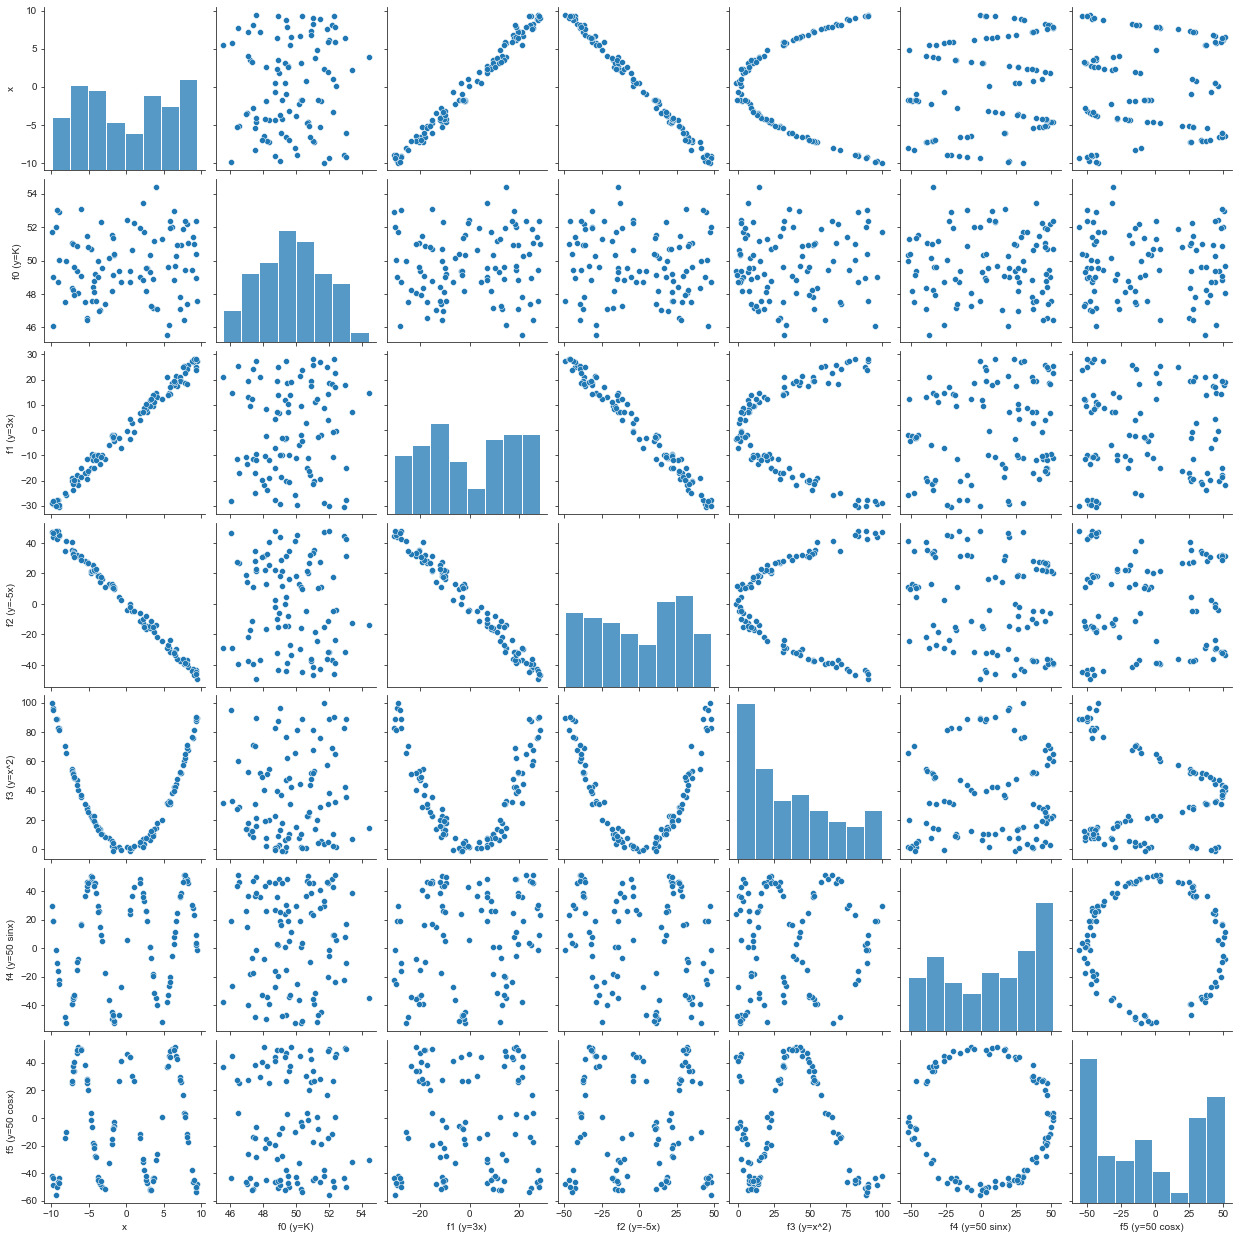

In [7]:
sb.pairplot(df)

(4) Tracer une carte thermique (*suggestion*: utiliser la fonction `heatmap`)

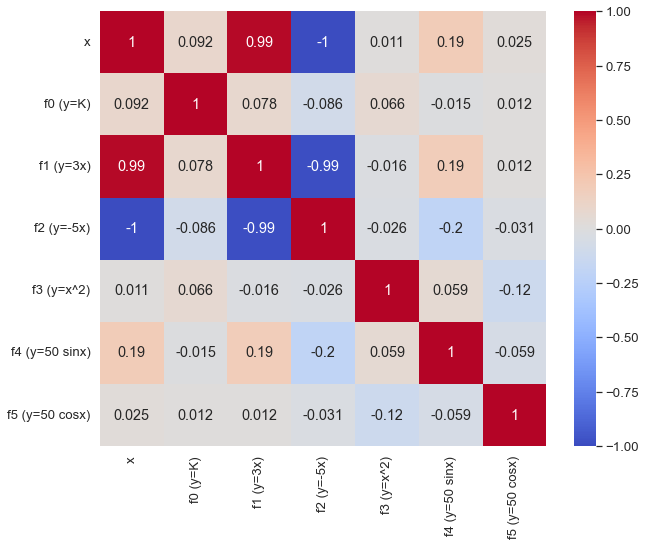

In [8]:
plt.figure(figsize = (10,8))
sb.set(font_scale=1.2)
_ = sb.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap='coolwarm')

### B. régression linéaire avec scikit learn

In [9]:
dfi=pd.read_csv('./iris-data/iris.csv', sep=";")
display(dfi)

from sklearn.linear_model import LinearRegression
pw = dfi["petal_width"].values.reshape(-1,1)
#print(pw.shape)
#print(pw)
pl = dfi["petal_length"].values
#print(pl.shape)
#print(pl)
# création de l'objet "régression linéaire"
fitlin = LinearRegression()

# recherche des paramètres du modèle linéaire
fitlin.fit(pw, pl)
pl_hat=fitlin.predict(pw)
a = fitlin.coef_
b = fitlin.intercept_
from sklearn.metrics import r2_score
r2 = r2_score(pl, pl_hat)
print("a   ={:8.3f}\nb   ={:8.3f}\nr^2 ={:8.5f}".format(a[0], b, r2))
from sklearn.metrics import mean_squared_error as MSE
print()
from sklearn.metrics import mean_absolute_error as MAE
print("MSE ={:8.3f}\nMAE ={:8.3f}".format(MSE(pl,pl_hat), MAE(pl,pl_hat)))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


a   =   2.226
b   =   1.091
r^2 = 0.92690

MSE =   0.226
MAE =   0.368


### C. One-hot-encoding de la colonne "species"
On va ajouter des colonnes dans la base de données initiale. 

Cette préparation "amont" permet de simplifier ce TP en masquant cette difficulté (toute relative).

In [12]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

dfi=pd.read_csv('./iris-data/iris.csv', sep=";")
print(f"Dfi. Structure (shape) :{dfi.shape}")
display(dfi)

# one-hot-encoding des espèces de y_train & y_test. 
# on utilise une fonction maison (y2c), qui elle-même appelle la fonction to_categorical de keras
# cette fonction est définie dans le package visualID importé au début ce ce notebook
uv = dfi["species"].unique()
print(f"Catégories uniques : {uv}") 
mapc2i = {}
for x in range(len(uv)):
    mapc2i[uv[x]] = x
print(f"Correspondance entre chaque catégorie unique et un entier : {mapc2i}")
species_ohe = vID.y2c(mapc2i,dfi["species"])
#

print(f"Structure (shape) de species_ohe : {species_ohe.shape}")
display(species_ohe)
del mapc2i
dfi[uv]=pd.DataFrame(species_ohe)
display(dfi)
dfi.to_csv('./iris-data/iris_ohe.csv',sep='\t',index=False)
del uv

Dfi. Structure (shape) :(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Catégories uniques : ['setosa' 'versicolor' 'virginica']
Correspondance entre chaque catégorie unique et un entier : {'setosa': 0, 'versicolor': 1, 'virginica': 2}
Structure (shape) de species_ohe : (150, 3)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,setosa,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,virginica,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,virginica,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,virginica,0.0,0.0,1.0


### D. Régression linéaire avec un neurone (perceptron)
<div class="rq">
On va prédire la longueur d'un pétale, connaissant sa largeur. Un unique neurone est suffisant pour cela. C'est proche du <a href="https://fr.wikipedia.org/wiki/Perceptron">perceptron inventé par Rosenblatt en 1958</a>, sauf qu'ici on va optimiser poids et biais avec l'algortihme de rétropropagation, qui est plus récent et dont le principe a relancé l'intérêt des réseaux de neurones. Ca va aussi donner l'opportunité d'analyser la modélisation mathématique d'un neurone, résumée sur la figure ci-dessous :
<br><br>
<p style="text-align: center"><img width="350px" src="./svg/1neuron-perceptron-woBackP.png" style="margin-left:auto; margin-right:auto" id="img_perceptron"/></p>
    Le neurone reçoit l'information <i>x</i> en entrée et l'optimisation de la connexion neuronale entre lui et le neurone d'entrée (<i>w</i>) va lui permettre de reproduire aussi bien que possible la valeur à reproduire (<i>y</i>). Ce schéma d'optimisation est accompli pour l'ensemble des données d'apprentissage.
</div>

#### D.1. Chargement des données et des librairies

In [1]:
import numpy as np 
import seaborn as sb
import pandas as pd
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from IPython.display import display


dfi=pd.read_csv('./iris-data/iris.csv', sep=";")
print(f"Dfi. Structure (shape) :{dfi.shape}")
display(dfi)

Dfi. Structure (shape) :(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### D.2. Séparation des données 

In [2]:
data_train = dfi.sample(frac=0.8, axis='index') 
data_test  = dfi.drop(data_train.index)
x_train = data_train[['petal_width']]
y_train = data_train[['petal_length']]
x_test = data_test[['petal_width']]
y_test = data_test[['petal_length']]

#### D.3. Définition et entraînement du modèle
Errors calculated between the actual and predicted sepal_length values (noted $Y$ and $\hat{Y}$ in equations below)  
MAE =  Mean Absolute Error 
$$\mathrm{MAE}=\frac{1}{n}\sum_{i}\left|\hat{Y}(x_{i})-Y(x_{i})\right|$$

MSE = Mean Squared Error  
$$\mathrm{MSE}=\frac{1}{n}\sum_{i}\left(\hat{Y}(x_{i})-Y(x_{i})\right)^{2}$$

In [3]:
def define_1ANN():
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(1, name='iLayer'))
    model.add(keras.layers.Dense(1, name='oLayer'))
    
    model.compile(optimizer = 'adam',
                  loss      = 'mse',
                  metrics   = ['mae', 'mse'] )
    return model

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
ANNmodel=define_1ANN()
ANNmodel.summary()
vID.chrono_start()
ANNhistory = ANNmodel.fit(x_train,
                    y_train,
                    epochs          = 700,
                    batch_size      = 10,
                    verbose         = 1,
                    validation_data = (x_test, y_test),
                    callbacks=[es])
vID.chrono_show()

2022-06-15 14:04:48.910653: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-15 14:04:48.911130: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-15 14:04:48.912351: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
oLayer (Dense)               (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


NameError: name 'vID' is not defined

#### D.4. Evaluation du modèle au cours de l'apprentissage

##### Erreurs en fin d'apprentissage

In [7]:
plt.rcParams["figure.figsize"] = (14,6)
EvTrain = ANNmodel.evaluate(x_train, y_train, verbose=0)
print(color.GREEN,color.GREEN,'x_train / loss      : {:5.4f}'.format(EvTrain[0]))
print('x_train/ mae       : {:5.4f}'.format(EvTrain[1]))
print('x_train / mse       : {:5.4f}'.format(EvTrain[2]),color.OFF)
print()
EvTest = ANNmodel.evaluate(x_test, y_test, verbose=0)
print(color.BLUE,color.BLUE,'x_test / loss      : {:5.4f}'.format(EvTest[0]))
print('x_test / mae       : {:5.4f}'.format(EvTest[1]))
print('x_test / mse       : {:5.4f}'.format(EvTest[2]),color.OFF)

  x_train / loss      : 0.2073
x_train/ mae       : 0.3619
x_train / mse       : 0.2073 

  x_test / loss      : 0.3320
x_test / mae       : 0.4480
x_test / mse       : 0.3320 


##### Evolution de l'erreur au cours des étapes d'apprentissage

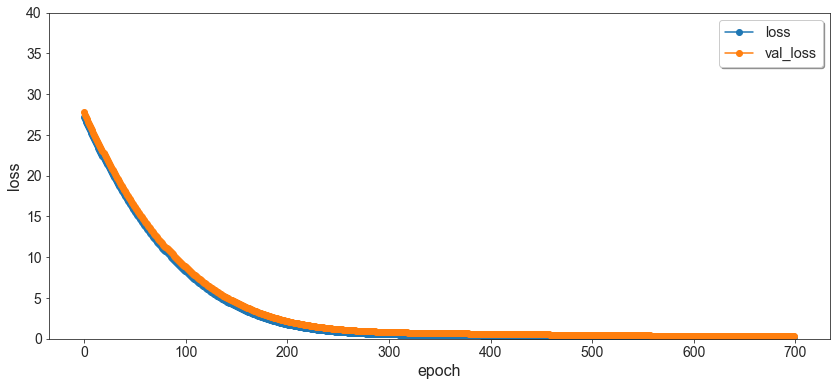

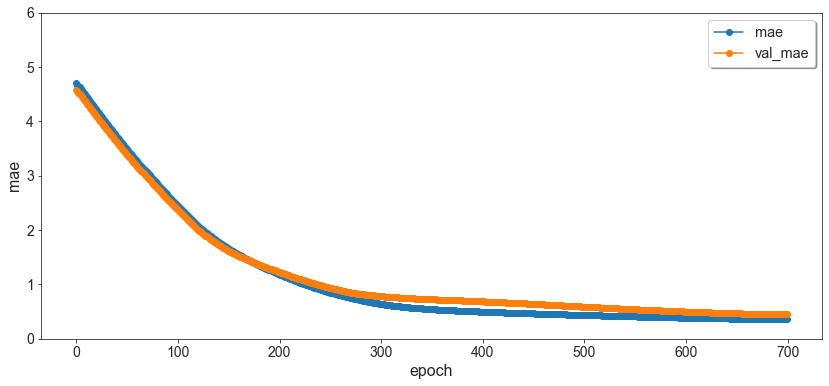

In [8]:
df=pd.DataFrame(data=ANNhistory.history)
figLOSS=df.plot(y=["loss","val_loss"],linestyle='-', marker='o',fontsize=14)
figLOSS.set_xlabel('epoch',fontdict={'fontsize':16})
figLOSS.set_ylabel('loss',fontdict={'fontsize':16})
figLOSS.set_ylim([0.0,40.0])
figLOSS.legend(loc='upper right', shadow=True, fontsize='x-large')

figMAE=df.plot(y=["mae","val_mae"],linestyle='-', marker='o',fontsize=14)
figMAE.set_xlabel('epoch',fontdict={'fontsize':16})
figMAE.set_ylabel('mae',fontdict={'fontsize':16})
figMAE.set_ylim([0.0,6.0])
figMAE.legend(loc='upper right', shadow=True, fontsize='x-large')

##### Prédiction de la largeur des pétales (petal_length) en fonction de leur largeur (petal_width)

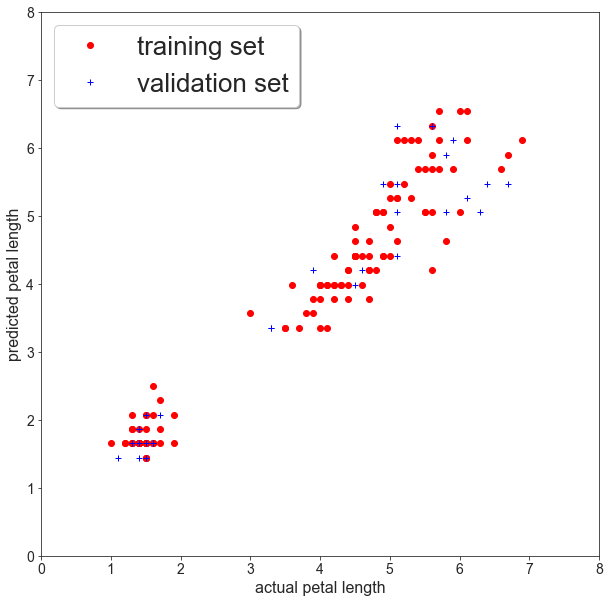

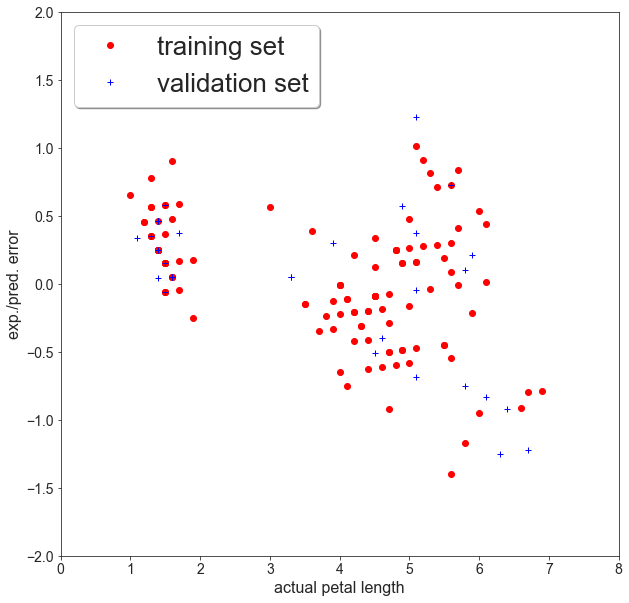

In [22]:
yhat_train=ANNmodel.predict(x_train)
yhat_test=ANNmodel.predict(x_test)
diffyt = yhat_train - y_train
diffyp = yhat_test - y_test
plt.rcParams["figure.figsize"] = (10,10)

maxL= 8.0
figP, axP = plt.subplots()
axP.plot(y_train,yhat_train,'ro',label='training set')
axP.plot(y_test,yhat_test,'b+',label='validation set')
axP.legend(loc='upper left', shadow=True, fontsize='x-large')
axP.set_xlim(0.0,maxL); axP.set_ylim(0.0,maxL)
axP.set_xlabel('actual petal length',fontsize=16)
axP.set_ylabel('predicted petal length',fontsize=16)
axP.tick_params(labelsize = 14)

figE, axE = plt.subplots()
axE.plot(y_train,diffyt,'ro',label='training set')
axE.plot(y_test,diffyp,'b+',label='validation set')
axE.legend(loc='upper left', shadow=True, fontsize='x-large')
axE.set_xlim(0.0,maxL); axE.set_ylim(-2,2)
axE.set_xlabel('actual petal length',fontsize=16)
axE.set_ylabel('exp./pred. error',fontsize=16)
axE.tick_params(labelsize = 14)

 Train. mean: 0.019    std: 0.455    MAE: 0.362     R2: 0.964
  Test. mean: 0.003    std: 0.576    MAE: 0.448     R2: 0.959


[Text(0, 0.5, '')]

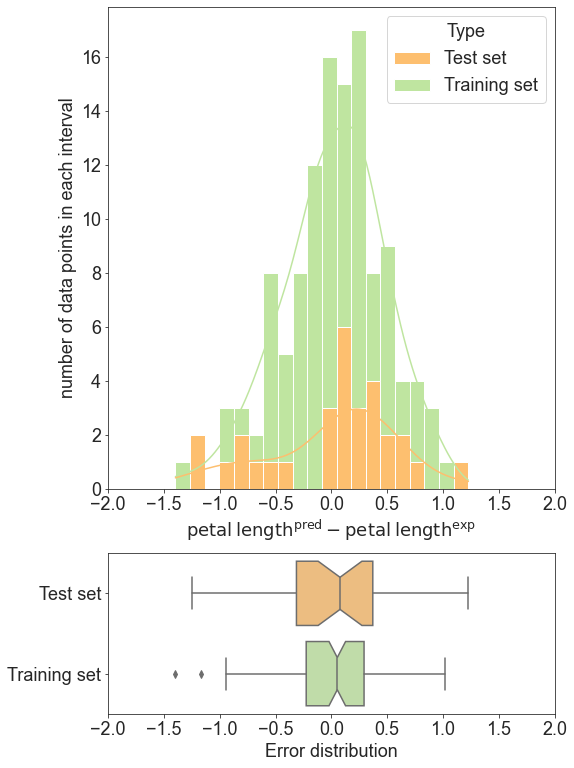

In [10]:
import seaborn as sb
from matplotlib import gridspec
print(color.BLUE,
      "Train.","mean: {:.3f}".format(np.mean(diffyt.values.ravel())),
      "   std: {:.3f}".format(np.std(diffyt.values.ravel())),
      "   MAE: {:.3f}".format(np.average(abs(diffyt.values.ravel()))),
      "    R2: {:.3f}".format(np.corrcoef(y_train.values.ravel(),yhat_train.ravel())[0,1])
     )
print(color.GREEN,
      " Test.","mean: {:.3f}".format(np.mean(diffyp.values.ravel())),
      "   std: {:.3f}".format(np.std(diffyp.values.ravel())),
      "   MAE: {:.3f}".format(np.average(abs(diffyp.values.ravel()))),
      "    R2: {:.3f}".format(np.corrcoef(y_test.values.ravel(),yhat_test.ravel())[0,1])
     )

# make a dataframe
df1 = pd.DataFrame(
    {
        "Error distribution": diffyp.values.ravel(),
        "Type": 'Test set'    },
)
df2 = pd.DataFrame(
    {
        "Error distribution": diffyt.values.ravel(),
        "Type": 'Training set'    },
)
distrib=pd.concat([df1,df2],ignore_index=True)

xlim=2.0
nbins=20
plt.rcParams["figure.figsize"] = (8,13) #on ajuste la taille du graphique
plt.rcParams["font.size"] = (18) #on ajuste la taille des caractères
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
plt.subplot(gs[0])
fig1=sb.histplot(data=distrib,x="Error distribution", hue="Type", bins=nbins, kde=True, palette='Spectral', alpha=1.0)
plt.xlabel("$\mathrm{petal\:length}^{\mathrm{pred}}-\mathrm{petal\:length}^{\mathrm{exp}}$")
plt.ylabel("number of data points in each interval")
plt.xlim(-xlim,xlim)
plt.subplot(gs[1])
plt.xlim(-xlim,xlim)
fig2=sb.boxplot(data=distrib, x="Error distribution", y="Type", notch=True, orient = 'h',palette='Spectral')
fig2.set(ylabel=None)


##### Affichage des paramètres du modèle

In [12]:
print(f"{color.BOLD}{color.RED}Output Layer{color.OFF}")
print("w:",ANNmodel.layers[0].get_weights()[0])
print("b:",ANNmodel.layers[0].get_weights()[1])

Output Layer
w: [[2.1246326]]
b: [1.2277683]


#### D.5. Régression linéaire standard

In [15]:
from scipy.stats import linregress
pw=dfi["petal_width"].to_numpy()
pl=dfi["petal_length"].to_numpy()
fit = linregress(x=pw, y=pl)

a = fit.slope
b = fit.intercept
r = fit.rvalue
stderr = fit.stderr
istderr = fit.intercept_stderr

print(f"a   = {a:8.3f}\nb   = {b:8.3f}\nR^2 = {r**2:6.3f}")
print(f"Erreur standard sur la valeur de la pente ={stderr:8.3f}\nErreur standard sur la valeur de l'ordonnée à l'origine ={istderr:8.3f}")

a   =    2.226
b   =    1.091
R^2 =  0.927
Erreur standard sur la valeur de la pente =   0.051
Erreur standard sur la valeur de l'ordonnée à l'origine =   0.073


#### D.6. Représentation graphique régression linéaire vs. ANN

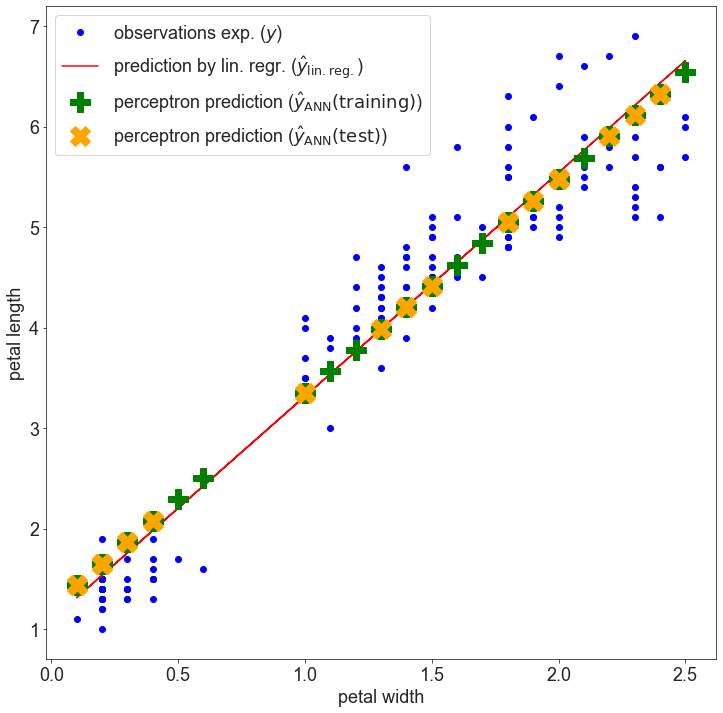

In [40]:
def y_hat(a,b,x):
    return a * x + b
# on calcule pl_hat la longueur prédite, pour chacune des largeurs (pw) mesurées expérimentalement
pl_hat = y_hat(a,b,pw)

plt.rcParams["figure.figsize"] = (12,12) #on ajuste la taille du graphique
plot(pw, pl,linestyle='', marker='o', color='blue', label='observations exp. ($y$)')
plot(pw,pl_hat,color='red',label='prediction by lin. regr. ($\hat{y}_\mathrm{lin.reg.}$)')
plot(x_train, yhat_train,linestyle='', marker='P', markersize=20, color='green', label='perceptron prediction ($\hat{y}_\mathrm{ANN}(\mathrm{training})$)')
plot(x_test, yhat_test,linestyle='', marker='X', markersize=20, color='orange', label='perceptron prediction ($\hat{y}_\mathrm{ANN}(\mathrm{test})$)')
xlabel("petal width") # label de l'axe des abscisses
ylabel("petal length") # label de l'axe des ordonnées
plt.legend() #affichage de la légende sur le graphe

### X. Divers pour l'élaboration du sujet (arrière-cuisine)

#### X.1. Tracé d'une fonction linéaire bruitée

,x,y
0,2.593129,17.395987
1,-6.401431,-15.998406
2,-1.222679,10.376649
3,-9.281396,-12.860913
4,-0.447121,6.547442
...,...,...
95,6.488133,29.708228
96,-9.442511,-11.293531
97,-4.673147,-1.034945
98,-7.025017,-7.087733


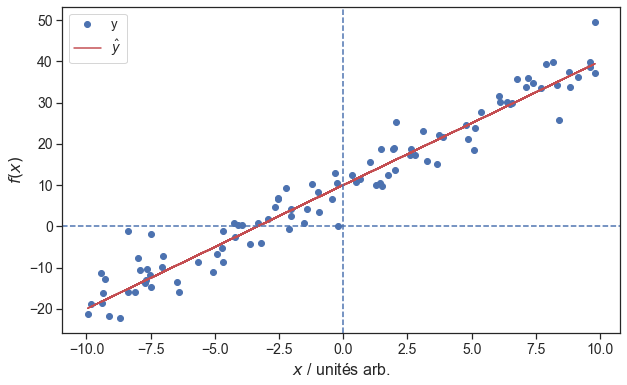

In [14]:
import numpy as np 
import seaborn as sb
import pandas as pd
import random
import matplotlib.pyplot as plt
sb.set_style("ticks")

def noiseF(f, X, noise):
    N = noise * np.random.normal(0,1,nbp)
#    print(N)
    # c_ "translates slice objects to concatenation along the second axis of the resulting 2D array" (cf doc)
    # en d'autres termes on concatène les colonnes de A & B quand on appelle c_(A,B) 
    tab = np.c_[X,f(X)+N]
    return tab 

def f1(x):
    return 3*x+10

nbp = 100
xmin = -10
xmax = 10. 
# vecteur X
# random.uniform(low=0.0, high=1.0, size=None)
X = np.random.uniform(xmin,xmax,nbp)
noisef1 = noiseF(f1,X,4)
f1tab = f1(X)
df1 = pd.DataFrame(noisef1, columns=['x','y'])
display(df1)
plt.rcParams["figure.figsize"] = (10,6)
axf1=df1.plot(x="x", y=["y"],fontsize=14, linestyle='', marker='o')
axf1.plot(X,f1tab,color='r',label='$\hat{y}$')
axf1.set_xlabel('$x$ / unités arb.',fontdict={'fontsize':16})
axf1.set_ylabel('$f(x)$',fontdict={'fontsize':16})
axf1.legend()
axf1.axvline(x = 0, color = 'b',linestyle='--')
axf1.axhline(y = 0, color = 'b',linestyle='--')
pngf1='./svg/fct1.png'
plt.savefig(pngf1,dpi=300,bbox_inches='tight',transparent=False)

#### X.2. Tracé d'une fonction quasi-linéaire bruitée

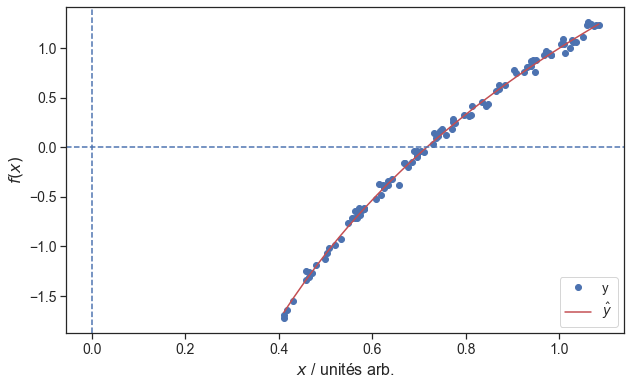

In [16]:
#exécuter d'abord le X.1
from numpy import log as ln
def f2(x):
    return 3*ln(x)+1

nbp = 100
xmin = 0.4
xmax = 1.1 
# vecteur X
# random.uniform(low=0.0, high=1.0, size=None)
X = np.random.uniform(xmin,xmax,nbp)
index=np.argsort(X, axis=0)
noisef2 = noiseF(f2,X,0.04)
X=X[index]
noisef2=noisef2[index,:]
f2exact = f2(X)
df2 = pd.DataFrame(noisef2, columns=['x','y'])
plt.rcParams["figure.figsize"] = (10,6)
axf2=df2.plot(x="x", y=["y"],fontsize=14, linestyle='', marker='o')
axf2.plot(X,f2exact,color='r',label='$\hat{y}$')
axf2.set_xlabel('$x$ / unités arb.',fontdict={'fontsize':16})
axf2.set_ylabel('$f(x)$',fontdict={'fontsize':16})
axf2.legend()
axf2.axvline(x = 0, color = 'b',linestyle='--')
axf2.axhline(y = 0, color = 'b',linestyle='--')

np.savetxt('data/f2.csv', noisef2, delimiter="\t")

#### X.3. Tracé d'une fonction polynomiale bruitée

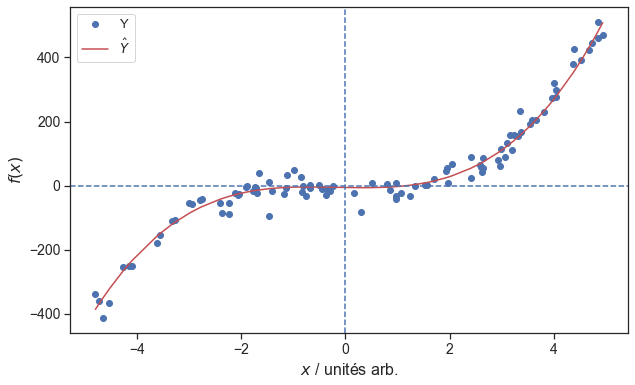

In [17]:
#exécuter d'abord le X.1
def fpol(x):
    return 4*x**3+2*x**2-3*x-6

nbp = 100
xmin = -5
xmax = 5 
# vecteur X
# random.uniform(low=0.0, high=1.0, size=None)
X = np.random.uniform(xmin,xmax,nbp)
index=np.argsort(X, axis=0)
X=X[index]
noisefpol = noiseF(fpol,X,30)
fpolexact = fpol(X)

dfpol = pd.DataFrame(noisefpol, columns=['X','Y'])
plt.rcParams["figure.figsize"] = (10,6)
axfpol=dfpol.plot(x="X", y=["Y"],fontsize=14, linestyle='', marker='o')
axfpol.plot(X,fpolexact,color='r',label='$\hat{Y}$')
axfpol.set_xlabel('$x$ / unités arb.',fontdict={'fontsize':16})
axfpol.set_ylabel('$f(x)$',fontdict={'fontsize':16})
axfpol.legend()
axfpol.axvline(x = 0, color = 'b',linestyle='--')
axfpol.axhline(y = 0, color = 'b',linestyle='--')
np.savetxt('data/fpol.csv', noisefpol, delimiter="\t")

#### X.4. Tracé de la même fonction polynomiale, sans bruit

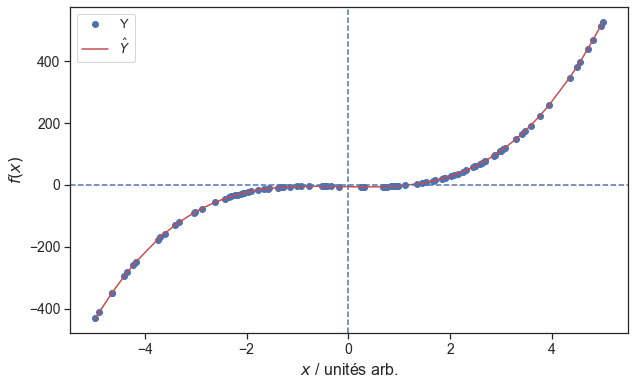

In [18]:
#exécuter d'abord le X.1, puis le X.3
X = np.random.uniform(xmin,xmax,nbp)
index=np.argsort(X, axis=0)
X=X[index]
nonoisefpol = noiseF(fpol,X,0)
fpolexact = fpol(X)

dfpol = pd.DataFrame(nonoisefpol, columns=['X','Y'])
plt.rcParams["figure.figsize"] = (10,6)
axfpol=dfpol.plot(x="X", y=["Y"],fontsize=14, linestyle='', marker='o')
axfpol.plot(X,fpolexact,color='r',label='$\hat{Y}$')
axfpol.set_xlabel('$x$ / unités arb.',fontdict={'fontsize':16})
axfpol.set_ylabel('$f(x)$',fontdict={'fontsize':16})
axfpol.legend()
axfpol.axvline(x = 0, color = 'b',linestyle='--')
axfpol.axhline(y = 0, color = 'b',linestyle='--')
np.savetxt('data/fpolNoNoise.csv', nonoisefpol, delimiter="\t")

#### X.5. Sauvegarde des jointplots & pairplots longueur/largeur

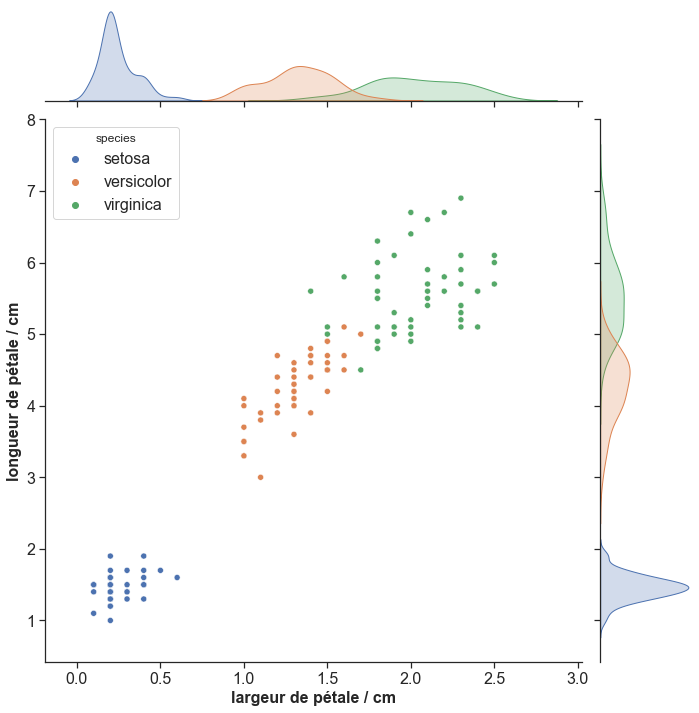

In [9]:
# importation de la libairie pandas
import pandas as pd
dfi=pd.read_csv('./iris-data/iris.csv', sep=";")
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt
sb.set()
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16
plt.rcParams["axes.labelweight"] = "bold"
sb.set_style("whitegrid")
sb.set_style("ticks",{"xtick.major.size":20,"ytick.major.size":20})
sb.axes_style("whitegrid") 
g = sb.jointplot(x = "petal_width", y = "petal_length", data = dfi, hue='species', height=10, kind='scatter', joint_kws={"marker":'o'})
g.set_axis_labels("largeur de pétale / cm", "longueur de pétale / cm", fontsize=16)
plt.savefig('./svg/jointplot_petals.png',dpi=300,bbox_inches='tight',transparent=False)
plt.show()

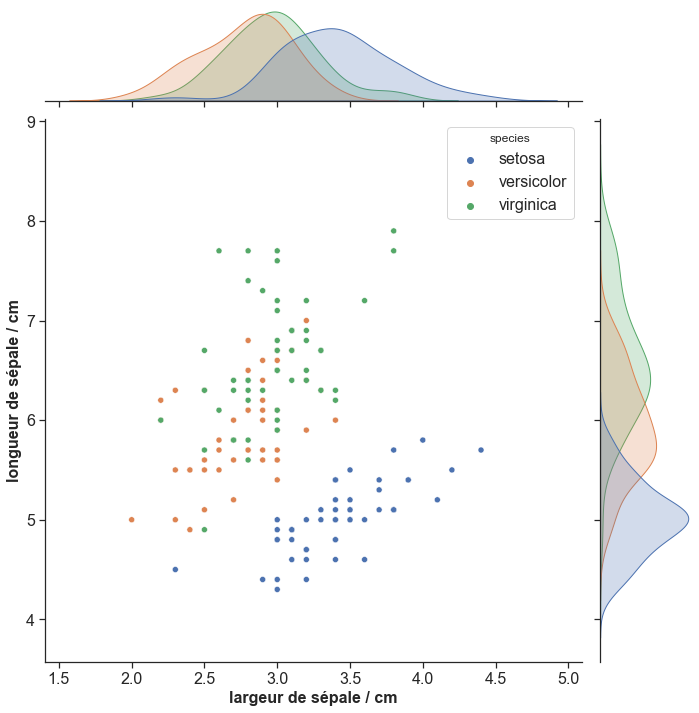

In [10]:
g = sb.jointplot(x = "sepal_width", y = "sepal_length", data = dfi, hue='species', height=10, kind='scatter', joint_kws={"marker":'o'})
g.set_axis_labels("largeur de sépale / cm", "longueur de sépale / cm", fontsize=16)
plt.savefig('./svg/jointplot_sepals.png',dpi=300,bbox_inches='tight',transparent=False)
plt.show()

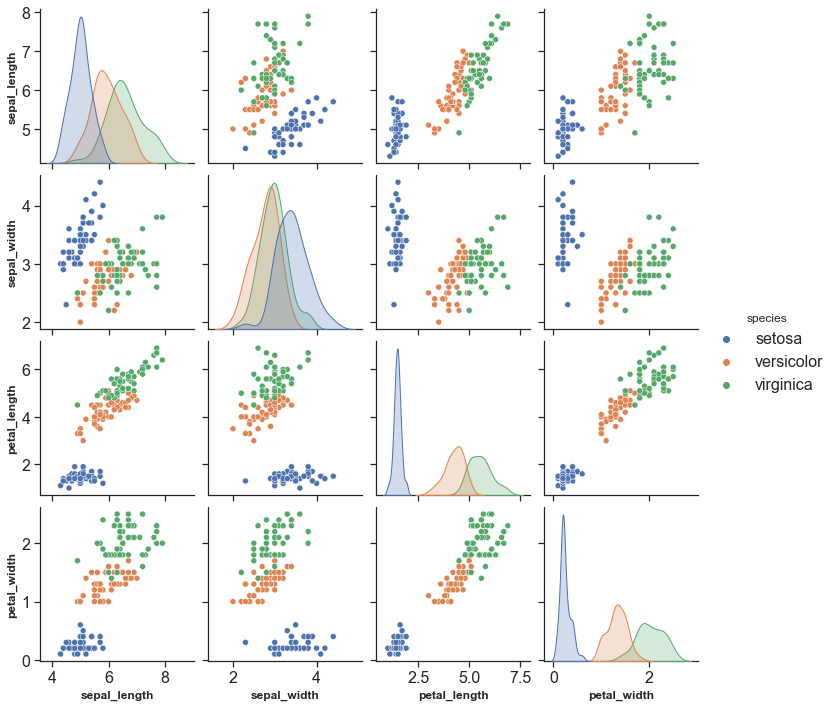

In [11]:
sb.pairplot(dfi,hue='species')
plt.savefig('./svg/pairplot_Iris.png',dpi=300,bbox_inches='tight',transparent=False)

In [12]:
vID.end()

**Fin à:** Wednesday 22 June 2022, 11:10:29  
**Durée:** 00:05:15 592ms

<p style="text-align: center"><img width="800px" src="./svg/logoFin.svg" style="margin-left:auto; margin-right:auto"/></p>